In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mne

In [2]:
file_path = '/Users/e4/E-2/DEAP_DATA/s01.dat'
data = np.fromfile(file_path, dtype=np.float32)

n_channels = 40       
n_time_points = 8064  
n_trials = len(data) // (n_channels * n_time_points)
data = data[:n_trials * n_channels * n_time_points].reshape(n_trials, n_channels, n_time_points)
subset = data[:10]  
print(subset.shape)

(10, 40, 8064)


In [3]:
if np.isnan(subset).any() or np.isinf(subset).any(): 
    subset = np.nan_to_num(subset)
    print("NaNs or Infs found and replaced.")
else:
    print("No NaNs or Infs found.")

NaNs or Infs found and replaced.


In [4]:
subset_flattened = subset.reshape(n_channels, 10 * n_time_points)
info = mne.create_info(ch_names=[f'EEG {i+1}' for i in range(n_channels)], sfreq=128, ch_types='eeg')
raw = mne.io.RawArray(subset_flattened, info)
print(raw.info)

Creating RawArray with float64 data, n_channels=40, n_times=80640
    Range : 0 ... 80639 =      0.000 ...   629.992 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG 1, EEG 2, EEG 3, EEG 4, EEG 5, EEG 6, EEG 7, EEG 8, EEG 9, ...
 chs: 40 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 40
 projs: []
 sfreq: 128.0 Hz
>


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 s)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Using matplotlib as 2D backend.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


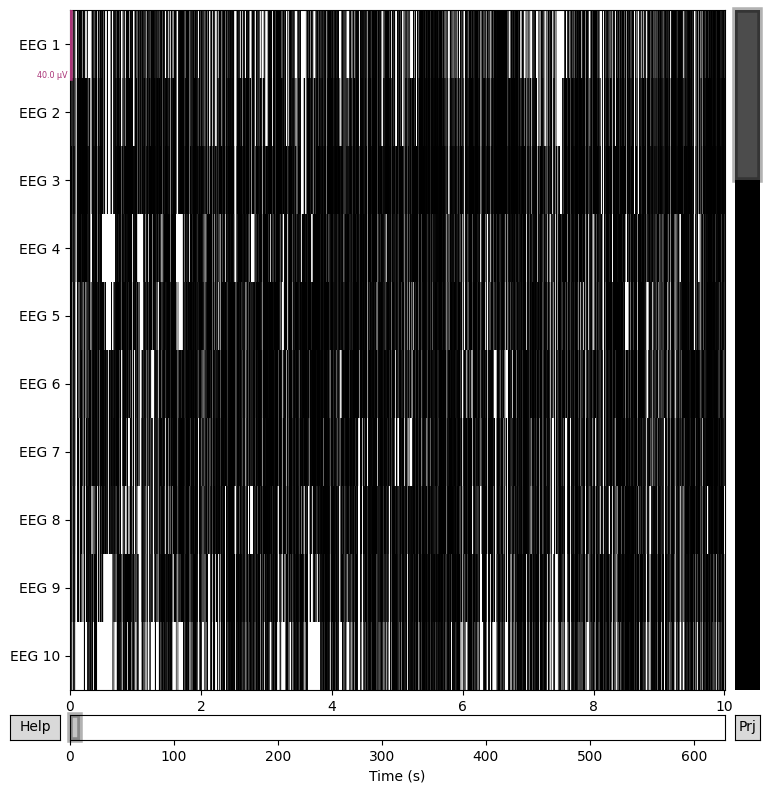

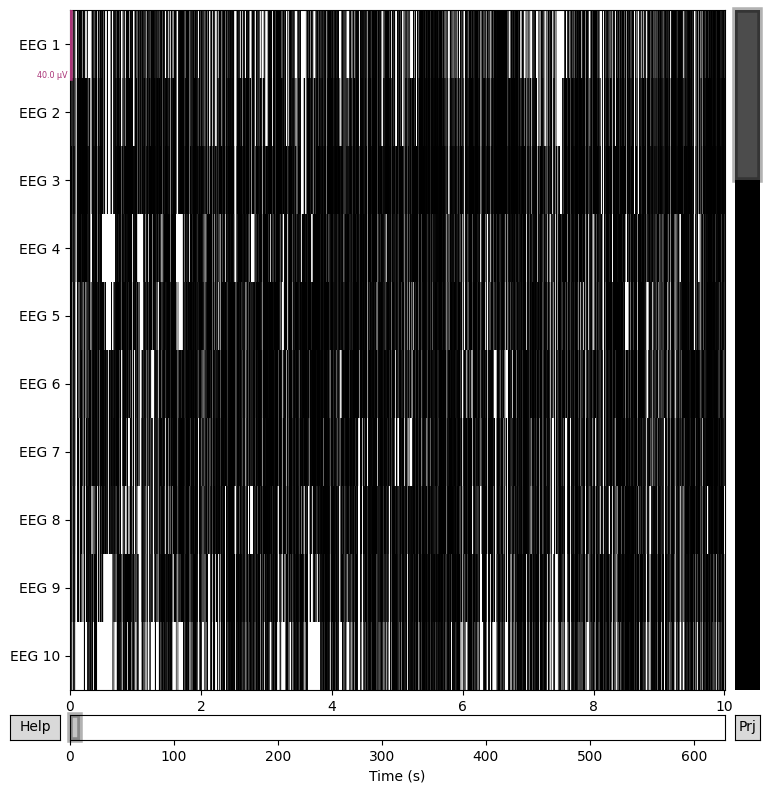

In [5]:
raw_filtered = raw.copy().filter(l_freq=1.0, h_freq=40.0)

raw_filtered.set_eeg_reference('average', projection=True)

raw_filtered.plot(n_channels=10, duration=10, start=0)

In [6]:
events = np.array([[int(i * raw.info['sfreq'] * 60), 0, int(i % 4 + 1)] for i in range(1, 41)])
event_id = {'Stimulus 1': 1, 'Stimulus 2': 2, 'Stimulus 3': 3, 'Stimulus 4': 4}

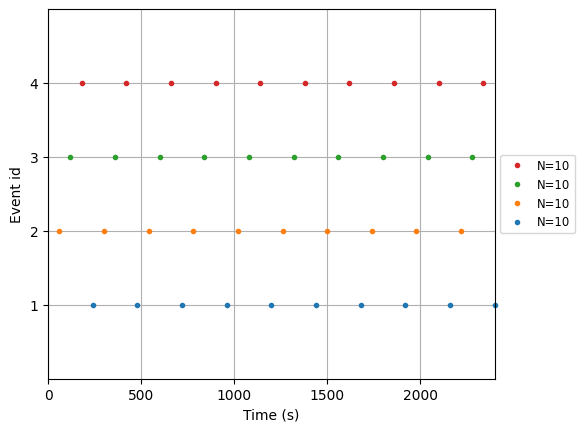

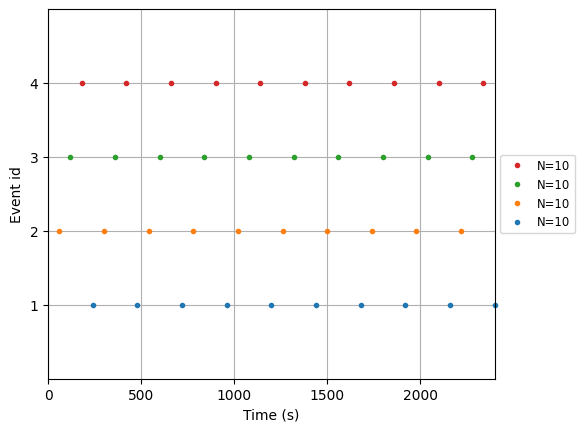

In [7]:
mne.viz.plot_events(events, sfreq=raw.info['sfreq'], first_samp=0)

In [8]:
events = mne.merge_events(events, [1, 2], 1)  
events = mne.merge_events(events, [3, 4], 2)  
event_id = {"auditory": 1, "visual": 2}

In [9]:
tmin, tmax = -0.2, 0.5
lowpass, highpass = 40, 0.1
baseline_tmin, baseline_tmax = None, 0  
ch = "EEG 21"

In [10]:
raw_filtered = raw.copy().filter(highpass, lowpass)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 4225 samples (33.008 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [11]:
epochs = mne.Epochs(
    raw_filtered,
    events,
    event_id,
    tmin=tmin,
    tmax=tmax,
    reject=dict(eeg=150e-6),
    flat=dict(eeg=5e-6),
    baseline=None,
    preload=True,
)

Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 91 original time points ...
    Rejecting  epoch based on EEG : ['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8', 'EEG 9', 'EEG 10', 'EEG 11', 'EEG 12', 'EEG 13', 'EEG 14', 'EEG 15', 'EEG 16', 'EEG 17', 'EEG 18', 'EEG 19', 'EEG 20', 'EEG 21', 'EEG 22', 'EEG 23', 'EEG 24', 'EEG 25', 'EEG 26', 'EEG 27', 'EEG 28', 'EEG 29', 'EEG 30', 'EEG 31', 'EEG 32', 'EEG 33', 'EEG 34', 'EEG 35', 'EEG 36', 'EEG 37', 'EEG 38', 'EEG 39', 'EEG 40']
    Rejecting  epoch based on EEG : ['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8', 'EEG 9', 'EEG 10', 'EEG 11', 'EEG 12', 'EEG 13', 'EEG 14', 'EEG 15', 'EEG 16', 'EEG 17', 'EEG 18', 'EEG 19', 'EEG 20', 'EEG 21', 'EEG 22', 'EEG 23', 'EEG 24', 'EEG 25', 'EEG 26', 'EEG 27', 'EEG 28', 'EEG 29', 'EEG 30', 'EEG 31', 'EEG 32', 'EEG 33', 'EEG 34', 'EEG 35', 'EEG 36', 'E

/var/folders/sx/5hg33bqj785_0chtp8jbtxbw0000gn/T/ipykernel_13827/482935781.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(


In [12]:

baseline = (baseline_tmin, baseline_tmax)
trad_aud = epochs["auditory"].average().apply_baseline(baseline)
trad_vis = epochs["visual"].average().apply_baseline(baseline)

RuntimeError: epochs.average() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.